# ABALONE DATA ANALYSIS

Abalones are marine snails. Their taxonomy puts them in the family Haliotidae which contains only one genus, Haliotis, which once contained six subgenera. These subgenera have become alternate representations of Haliotis. The number of species recognized worldwide ranges between 30 and 130 with over 230 species-level taxa described. The most comprehensive treatment of the family considers 56 species valid, with 18 additional subspecies.

# Requirement

To Determine The Age Of The Rings

 The original stated problem is estimate the age an abalone, which can be determined from the number of rings in their shell. However, counting the number of rings in an abalone shell is an expensive method. Thus, one possible solution is predict the number of rings of an abalone from characteristics like height, diameter, lenght and weight measurements.

# Attributes that contributes in Calculating the age of the rings

Sex  / M, F, and I (infant)


Length / Longest shell measurement

Diameter / perpendicular to length

Height /  with meat in shell

Whole weight / whole abalone

Shucked weight / weight of meat

Viscera weight / gut weight (after bleeding)

Shell weight / after being dried




# Import Libraries


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df= pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Type and sample of the dataset

In [3]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [4]:
df.shape

(4177, 9)

Checking For Null Values

In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

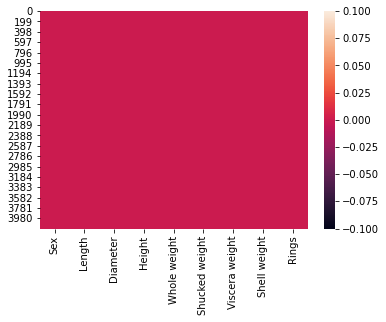

In [6]:
sns.heatmap(df.isnull())
plt.show()

The dataset has no null values, so proceeding with the further analysis

In [7]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Analysing each parameter

<AxesSubplot:xlabel='Sex', ylabel='count'>

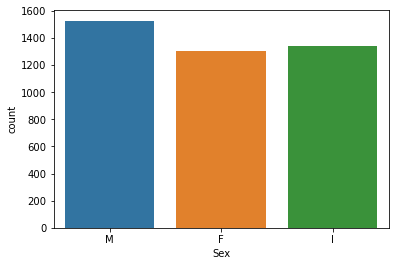

In [8]:
sns.countplot(df['Sex'])

The above graph shows there are more male abalone found than the female and infants

# Encode Gender column

In [9]:
LE= LabelEncoder()
df['Sex']= LE.fit_transform(df['Sex'])


In [10]:
LE.inverse_transform([2,1,0])

array(['M', 'I', 'F'], dtype=object)

In [11]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<AxesSubplot:xlabel='Diameter', ylabel='Density'>

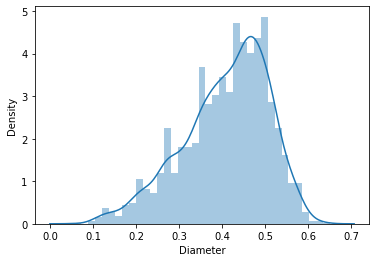

In [12]:
sns.distplot(df['Diameter'])

From the above plot, it is clear that the diameter ranges from 0.1 to 0.65. Most shells have diameter of 0.35 to 0.55

<AxesSubplot:xlabel='Length', ylabel='Density'>

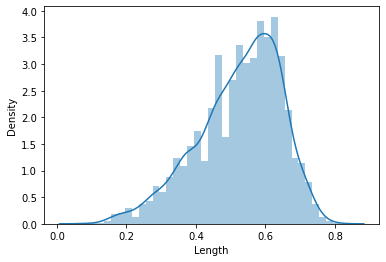

In [13]:
sns.distplot(df['Length'])

The length is distributed between 0.45 to 0.7

<AxesSubplot:xlabel='Height', ylabel='Density'>

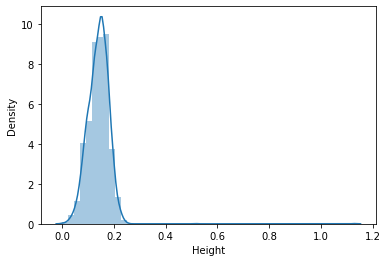

In [13]:
sns.distplot(df['Height'])

The Height of the abalone is distributed within the range of 0.2 to 0.22 only

<AxesSubplot:xlabel='Shucked weight', ylabel='Count'>

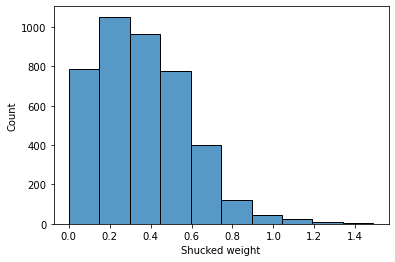

In [14]:
sns.histplot(df['Shucked weight'], bins=10)

Most shell have shucked weight between 0.2 to 0.4

<AxesSubplot:xlabel='Whole weight', ylabel='Count'>

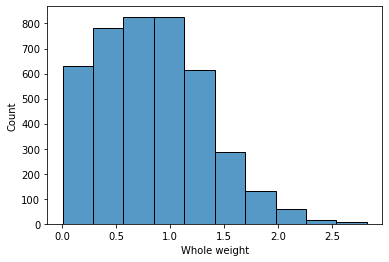

In [15]:
sns.histplot(df['Whole weight'], bins=10)

<AxesSubplot:xlabel='Shell weight', ylabel='Count'>

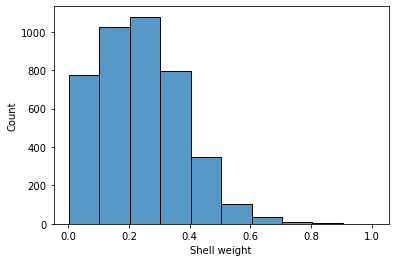

In [16]:
sns.histplot(df['Shell weight'], bins=10)

In [17]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# To Find Correlation 

In [18]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


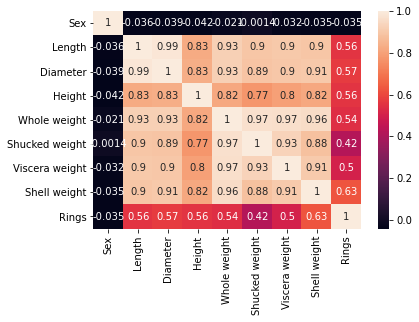

<Figure size 1080x576 with 0 Axes>

In [19]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(15,8))
plt.show()

# Correlation Outcome

The columns(length, Diameter) and (Whole weight, Shucked weight) seems to be highly correlated.

We have to check for multicolinearity. We can use VIF

The Shell weight and Diameter are highly correlated to the dependent variable(Rings)

# VIF

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
df1=df.iloc[:,0:8]
df1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [22]:
df1.shape

(4177, 8)

In [23]:
df1.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

In [24]:
df1.shape[1]#x.shape[1]

8

In [25]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [26]:
vif_fun()

,vif_factor,features
0,2.555356,Sex
1,700.488988,Length
2,749.121626,Diameter
3,42.128924,Height
4,421.652484,Whole weight
5,101.674946,Shucked weight
6,63.585627,Viscera weight
7,81.873737,Shell weight


Length and Diameter has high VIF factor, indicating high collinearity. Among which Diameter is highly correlated with Output, so we can drop Length.

Whole weight and Shucked weight has high VIF factor, among which Whole weight is highly correlated with Output, so we can drop Shucked weight

# Drop The columns with collinearity

In [27]:
df.drop(['Length', 'Shucked weight'], axis=1, inplace=True)
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [28]:
df1=df.iloc[:,0:-1]

In [29]:
df1.columns

Index(['Sex', 'Diameter', 'Height', 'Whole weight', 'Viscera weight',
       'Shell weight'],
      dtype='object')

In [30]:
df1.shape

(4177, 6)

In [31]:
vif_fun()

,vif_factor,features
0,2.532536,Sex
1,46.978990,Diameter
2,41.650431,Height
3,123.993316,Whole weight
4,59.292682,Viscera weight
5,49.403495,Shell weight


# Check For Skewness

In [32]:
df1.skew().sort_values(ascending=False)

Height            3.128817
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Sex              -0.098155
Diameter         -0.609198
dtype: float64

Height Column has very high skewness. Remove Skewness with Power Transform method

In [33]:
from sklearn.preprocessing import power_transform

In [34]:
df1_new= power_transform(df1)

In [35]:
df1=pd.DataFrame(df1_new, columns= df1.columns)
df1

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,1.127072,-0.549860,-1.124512,-0.576766,-0.693283,-0.587809
1,1.127072,-1.387333,-1.264396,-1.351761,-1.332953,-1.332420
2,-1.307935,0.008537,-0.064823,-0.198099,-0.255135,-0.098262
3,1.127072,-0.549860,-0.320227,-0.571893,-0.547782,-0.544931
4,-0.009459,-1.459659,-1.549424,-1.413146,-1.451759,-1.485528
...,...,...,...,...,...,...
4172,-1.307935,0.345636,0.666117,0.241948,0.639623,0.193008
4173,1.127072,0.230611,-0.064823,0.395706,0.433568,0.275215
4174,1.127072,0.645191,1.565082,0.777944,1.015607,0.598398
4175,-1.307935,0.769928,0.307083,0.633874,0.815184,0.519145


In [36]:
df1.skew().sort_values(ascending=False)

Viscera weight    0.039780
Shell weight      0.023390
Whole weight     -0.003980
Diameter         -0.065977
Height           -0.115483
Sex              -0.176442
dtype: float64

In [37]:
sk=df1.skew()
sk

Sex              -0.176442
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

In [38]:
df1.skew()[np.abs(df1.skew())<0.25].all()

True

# Checking For Outliers

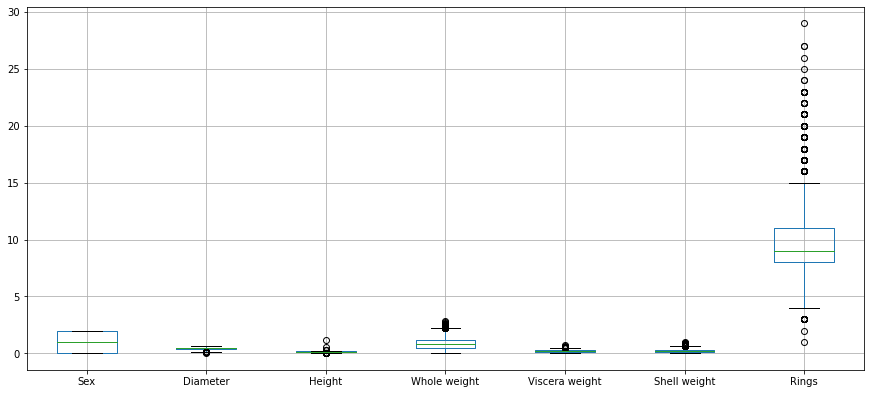

In [39]:
df.boxplot(figsize=(15,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

Some outliers are present in Diameter, Height and Shell weight. So we will remove the outliers

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.15198011, 0.43214879, 1.06442415, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.439929  , 1.18397831, ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.12213032, 0.10799087, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.67640943, 1.56576738, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.77718745, 0.25067161, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.48263359, 1.32665906, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [41]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  236,  237,  238,  270,  275,
        277,  278,  294,  310,  313,  314,  334,  351,  355,  358,  358,
        362,  375,  416,  417,  428,  431,  433,  469,  478,  480,  501,
        526,  530,  572,  628,  673,  674,  675,  678,  694,  696,  719,
        720,  744,  754,  756,  811,  891,  891, 1048, 1051, 1052, 1204,
       1206, 1207, 1207, 1207, 1209, 1257, 1417, 1422, 1427, 1427, 1428,
       1429, 1757, 1759, 1762, 1762, 1763, 1763, 1987, 2051, 2090, 2108,
       2108, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209, 2274,
       2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2436, 2459,
       2471, 2623, 2624, 2624, 2709, 2710, 2810, 2811, 2811, 2863, 2863,
       3008, 3140, 3148, 3149, 3149, 3151, 3151, 3188, 3193, 3280, 3359,
       3427, 3427, 3599, 3628, 3715, 3715, 3715, 3800, 3837, 3899, 3924,
       3930, 3944, 3996, 4145, 4148], dtype=int64)

In [42]:
z[163][5]

5.504642062399616

In [43]:
df_new= df[(z<3).all(axis=1)]

In [44]:
df.shape

(4177, 7)

In [45]:
df_new.shape

(4050, 7)

Percentage loss

In [46]:
loss_percent= (4177-4050)/ 4177*100
loss_percent

3.040459660043093

Very less percent of the data is lost from outliers removal

In [64]:
x= df_new.iloc[:,0:-1]
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


In [65]:
y=df_new.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4050, dtype: int64

In [66]:
x.shape

(4050, 6)

In [67]:
y.shape

(4050,)

Since the Target variable is categorical with more than 2 classes, we use classification models to train our data

# Training the Model

In [68]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# TO Find Best Random State

MultinomialNB

In [69]:
maxAcc=0
maxRS=0

for i in range(1,200):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    mnb=MultinomialNB()
    mnb.fit(xtrain,ytrain)
    predmnb= mnb.predict(xtest)
    acc= accuracy_score(ytest,predmnb)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy_score is", maxAcc, 'on Random_state',maxRS)

Best Accuracy_score is 0.4 on Random_state 29


DecisionTreeClassifier

In [70]:
maxAcc=0
maxRS=0

for i in range(1,200):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(xtrain,ytrain)
    preddtc= dtc.predict(xtest)
    acc= accuracy_score(ytest,preddtc)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy_score is", maxAcc, 'on Random_state',maxRS)

Best Accuracy_score is 0.5 on Random_state 153


RandomForestClassifier

In [71]:
maxAcc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(xtrain,ytrain)
    predrf=rf.predict(xtest)
    acc= accuracy_score(ytest,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy_score is", maxAcc, 'on Random_state',maxRS)

Best Accuracy_score is 0.5 on Random_state 4


SVC

In [146]:
maxAcc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    svc=SVC(kernel='linear')
    svc.fit(xtrain,ytrain)
    predsvc= svc.predict(xtest)
    acc= accuracy_score(ytest,predsvc)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy_score is", maxAcc, 'on Random_state',maxRS)

Best Accuracy_score is 0.5 on Random_state 28


KNeighborsClassifier

In [73]:
maxAcc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(xtrain,ytrain)
    predknn= knn.predict(xtest)
    acc= accuracy_score(ytest,predknn)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy_score is", maxAcc, 'on Random_state',maxRS)

Best Accuracy_score is 0.5 on Random_state 28


From the above results, KNeighborsClassifier, RandomForestClassifier, SVC has highest accuracy

Check Accuracy of each model

KNeighborsClassifier

In [88]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20, random_state=28)
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print('acc=', accuracy_score(ytest,predknn))
print(confusion_matrix(ytest,predknn))
print(classification_report(ytest,predknn))

acc= 0.5
[[0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 1 3 0 0 0 0 0 0]
 [1 0 0 2 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 0 1 0 0 3 1 0 0]
 [0 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.60      0.75      0.67         4
           8       0.40      0.67      0.50         3
           9       1.00      0.33      0.50         3
          10       0.75      0.60      0.67         5
          11       0.33      0.50      0.40         2
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1

    accuracy                           0.50        20
   macro avg       0.34      0.32      0.30        20
weighted avg       0.55      0.50      0.49        20



MultinomialNB

In [89]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20, random_state=28)
mnb=MultinomialNB()
mnb.fit(xtrain,ytrain)
predmnb= mnb.predict(xtest)
print('acc=', accuracy_score(ytest,predmnb))
print(confusion_matrix(ytest,predmnb))
print(classification_report(ytest,predmnb))

acc= 0.25
[[0 0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 3 2 0 0 0]
 [0 0 0 2 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]]
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.17      1.00      0.29         3
          10       1.00      0.40      0.57         5
          11       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1

    accuracy                           0.25        20
   macro avg       0.15      0.17      0.11        20
weighted avg       0.28      0.25      0.19        20



DecisionTreeClassifier

In [90]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20, random_state=28)
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('acc=', accuracy_score(ytest,preddtc))
print(confusion_matrix(ytest,preddtc))
print(classification_report(ytest,preddtc))

acc= 0.15
[[0 1 0 0 0 0 0 0 0]
 [0 2 1 0 1 0 0 0 0]
 [1 0 1 1 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 0 1 0 3 0 1 0]
 [0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]]
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
           7       0.67      0.50      0.57         4
           8       0.20      0.33      0.25         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1

    accuracy                           0.15        20
   macro avg       0.10      0.09      0.09        20
weighted avg       0.16      0.15      0.15        20



RandomForestClassifier

In [91]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20, random_state=28)
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('acc=', accuracy_score(ytest,predrf))
print(confusion_matrix(ytest,predrf))
print(classification_report(ytest,predrf))

acc= 0.45
[[0 1 0 0 0 0 0 0 0]
 [0 3 1 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0]
 [0 0 1 2 0 0 0 0 0]
 [0 0 0 0 2 3 0 0 0]
 [0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0]]
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
           7       0.75      0.75      0.75         4
           8       0.25      0.33      0.29         3
           9       0.67      0.67      0.67         3
          10       0.67      0.40      0.50         5
          11       0.25      0.50      0.33         2
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1

    accuracy                           0.45        20
   macro avg       0.29      0.29      0.28        20
weighted avg       0.48      0.45      0.45        20



SVC

In [149]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20, random_state=28)
svc=SVC()
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print('acc=', accuracy_score(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))
print(classification_report(ytest,predsvc))

acc= 0.5
[[1 0 0 0 0 0 0 0]
 [0 1 2 1 0 0 0 0]
 [1 0 2 0 0 0 0 0]
 [0 0 1 2 0 0 0 0]
 [0 0 0 0 3 2 0 0]
 [0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]]
              precision    recall  f1-score   support

           6       0.50      1.00      0.67         1
           7       1.00      0.25      0.40         4
           8       0.33      0.67      0.44         3
           9       0.40      0.67      0.50         3
          10       1.00      0.60      0.75         5
          11       0.33      0.50      0.40         2
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1

    accuracy                           0.50        20
   macro avg       0.45      0.46      0.40        20
weighted avg       0.62      0.50      0.48        20



In [92]:
from sklearn.ensemble import AdaBoostClassifier
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20, random_state=28)
ad=AdaBoostClassifier()
ad.fit(xtrain,ytrain)
predad= mnb.predict(xtest)
print('acc=', accuracy_score(ytest,predad))
print(confusion_matrix(ytest,predad))
print(classification_report(ytest,predad))

acc= 0.25
[[0 0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 3 2 0 0 0]
 [0 0 0 2 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]]
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.17      1.00      0.29         3
          10       1.00      0.40      0.57         5
          11       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1

    accuracy                           0.25        20
   macro avg       0.15      0.17      0.11        20
weighted avg       0.28      0.25      0.19        20



In [93]:
from sklearn.ensemble import GradientBoostingClassifier
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20, random_state=28)
gd=GradientBoostingClassifier()
gd.fit(xtrain,ytrain)
predgd= gd.predict(xtest)
print('acc=', accuracy_score(ytest,predgd))
print(confusion_matrix(ytest,predgd))
print(classification_report(ytest,predgd))

acc= 0.25
[[0 0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 3 2 0 0 0]
 [0 0 0 2 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]]
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.17      1.00      0.29         3
          10       1.00      0.40      0.57         5
          11       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1

    accuracy                           0.25        20
   macro avg       0.15      0.17      0.11        20
weighted avg       0.28      0.25      0.19        20



# Cross Validation For Each Model

In [94]:
from sklearn.model_selection import cross_val_score

In [133]:
scr=cross_val_score(knn, x,y, cv=7)
print('Cross Validation Score of KNeighborsClassifier is:', scr.mean())

Cross Validation Score of KNeighborsClassifier is: 0.22692533276645005


In [134]:
scr1=cross_val_score(mnb, x,y, cv=7)
print('Cross Validation Score of MultinomialNB is:', scr1.mean())

Cross Validation Score of MultinomialNB is: 0.16962231402771413


In [135]:
scr2=cross_val_score(rf, x,y, cv=7)
print('Cross Validation Score of RandomForestClassifier is:', scr2.mean())

Cross Validation Score of RandomForestClassifier is: 0.23161748698260162


In [136]:
scr3=cross_val_score(dtc, x,y, cv=7)
print('Cross Validation Score of DecisionTreeClassifier is:', scr3.mean())

Cross Validation Score of DecisionTreeClassifier is: 0.1861857208595111


In [137]:
scr4=cross_val_score(svc, x,y, cv=7)
print('Cross Validation Score of SupportVectorClassifier is:', scr4.mean())

Cross Validation Score of SupportVectorClassifier is: 0.25185923195855603


In [138]:
scr5=cross_val_score(ad, x,y, cv=7)
print('Cross Validation Score of AdaBoostClassifier is:', scr5.mean())

Cross Validation Score of AdaBoostClassifier is: 0.15852369597640945


In [139]:
scr6=cross_val_score(gd, x,y, cv=7)
print('Cross Validation Score of GradientBoostingClassifier is:', scr6.mean())

Cross Validation Score of GradientBoostingClassifier is: 0.25062984657441156


From the above validation SVC performs better than the other models

# GridSearchCV

In [140]:
SVC()

SVC()

In [141]:
from sklearn.model_selection import GridSearchCV

In [144]:
parameters={'gamma': ['scale', 'auto'],
            'decision_function_shape': ['ovo', 'ovr'],
            'kernel':['linear', 'poly', 'rbf']}

In [145]:
GCV=GridSearchCV(SVC(), parameters, cv=7, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}

In [147]:
GCV.best_estimator_

SVC(decision_function_shape='ovo', kernel='linear')

In [148]:
GCV_pred=GCV.best_estimator_.predict(xtest)
accuracy_score(ytest,GCV_pred)

0.25

RandomForestClassifier

In [ ]:
RandomForestClassifier()

In [150]:
parameters={'max_features': ["auto", "sqrt", "log2"],
            'max_depth': [4,5,6,7,8],
            'criterion':["gini", "entropy"]}

In [151]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=7, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto'}

In [152]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4)

In [153]:
GCV_pred=GCV.best_estimator_.predict(xtest)
accuracy_score(ytest,GCV_pred)

0.35

GridSearchCV has given an improved accuracy to the model.

# Model Saving

In [155]:
import pickle
filename= 'Abalone.pkl'
pickle.dump(GCV.best_estimator_,open(filename, 'wb'))

In [156]:
x=np.array(ytest)
predicted= np.array(GCV.best_estimator_.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,8,8
1,8,8
2,9,9
3,10,11
4,18,9
5,11,9
6,14,8
7,10,10
8,10,11
9,10,11
